# Workshop: Review Classification & Evaluation with Baseline Models

In this workshop, we'll dive into how to classify reviews using several baseline models, evaluate model performance using various metrics, and explore advanced techniques for error analysis and computational optimization.

## Objectives:
1. Set up and train baseline models (Logistic Regression, Naive Bayes, Gradient Boosting) for review classification.
2. Analyze and compare the performance of these models using key evaluation metrics such as precision, recall, and F1 score.
3. Evaluate computational metrics, including time-to-result and memory usage.
4. Apply feature engineering to refine models and explore methods for from model outputs analysis.
5. Perform error analysis to identify patterns in false positives and false negatives, and explore methods to improve model performance.


By the end of this workshop, you will have hands-on experience in building baseline models, improving their performance, and evaluating both their computational efficiency and prediction accuracy.

Let’s get started!

## Step 1: Dataset Setup (AG News)

1. Download and Load the AG News dataset:
    * Objective: Prepare the dataset for multi-class classification tasks (news categorization).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load AG News dataset from HuggingFace
from datasets import load_dataset

# Load dataset and split
ag_news = load_dataset("ag_news")
df = pd.DataFrame(ag_news['train'])

# Prepare features and labels
X = df['text']
y = df['label']

Let's split the dataset into training and testing sets.

In [2]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's take a look at the dataset.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


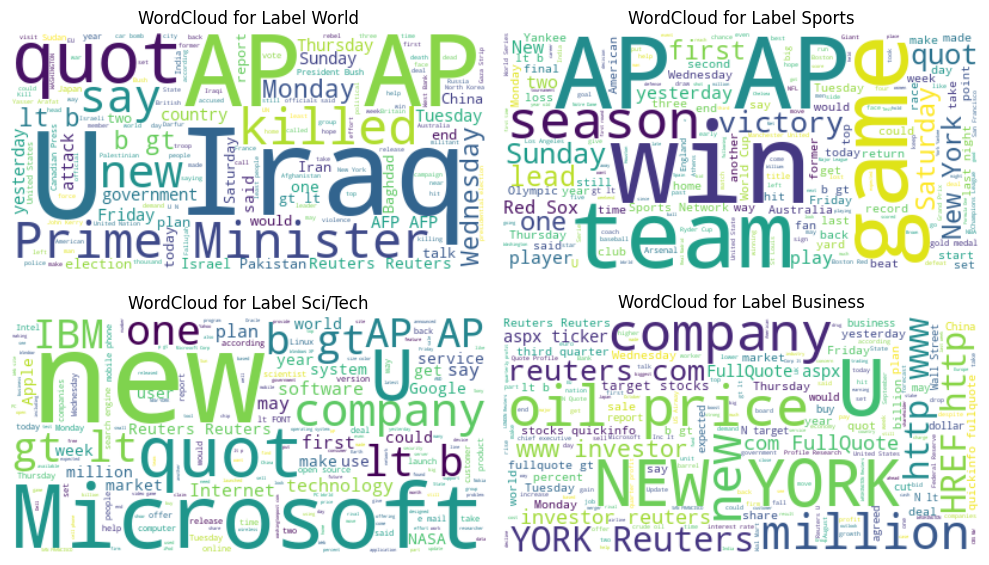

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

labels = {0: 'World', 1: 'Sports',
          2: 'Business', 3: 'Sci/Tech'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(X_train, y_train):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

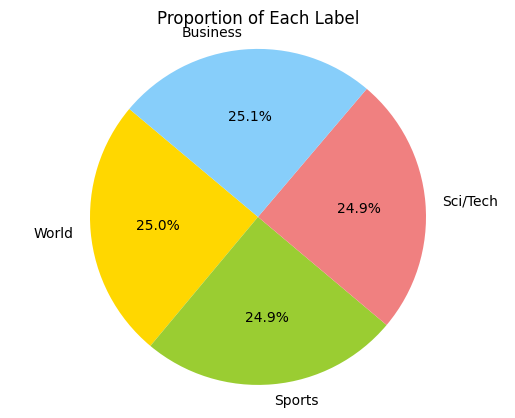

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each label
label_counts = Counter(y_train)

# Data to plot
_labels = [labels.get(lab) for lab in label_counts.keys()]
sizes = label_counts.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plotting the pie chart
plt.pie(sizes, labels=_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Each Label')
plt.show()


## Step 2: Baseline Model Setup

2. Train Logistic Regression, Gradient Boosting, and Naive Bayes models:
    * Objective: Establish baseline performance for three models and compare them.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Define pipelines for each model
log_reg_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', MultinomialNB())
])

gbc_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', GradientBoostingClassifier())
])



In [6]:
# Fit and predict for each pipeline
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

gbc_pipeline.fit(X_train, y_train)
y_pred_gbc = gbc_pipeline.predict(X_test)

In [11]:
# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-score': f1_score(y_true, y_pred, average='weighted')
    }

# Calculate metrics for each model
metrics_log_reg = calculate_metrics(y_test, y_pred_log_reg)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_gbc = calculate_metrics(y_test, y_pred_gbc)

In [12]:
# Create a dictionary with the results
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Gradient Boosting'],
    'Accuracy': [metrics_log_reg['Accuracy'], metrics_nb['Accuracy'], metrics_gbc['Accuracy']],
    'Precision': [metrics_log_reg['Precision'], metrics_nb['Precision'], metrics_gbc['Precision']],
    'Recall': [metrics_log_reg['Recall'], metrics_nb['Recall'], metrics_gbc['Recall']],
    'F1-score': [metrics_log_reg['F1-score'], metrics_nb['F1-score'], metrics_gbc['F1-score']]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-score
Logistic Regression  0.892792   0.892653 0.892792  0.892675
        Naive Bayes  0.893042   0.892351 0.893042  0.892530
  Gradient Boosting  0.831708   0.834254 0.831708  0.832390


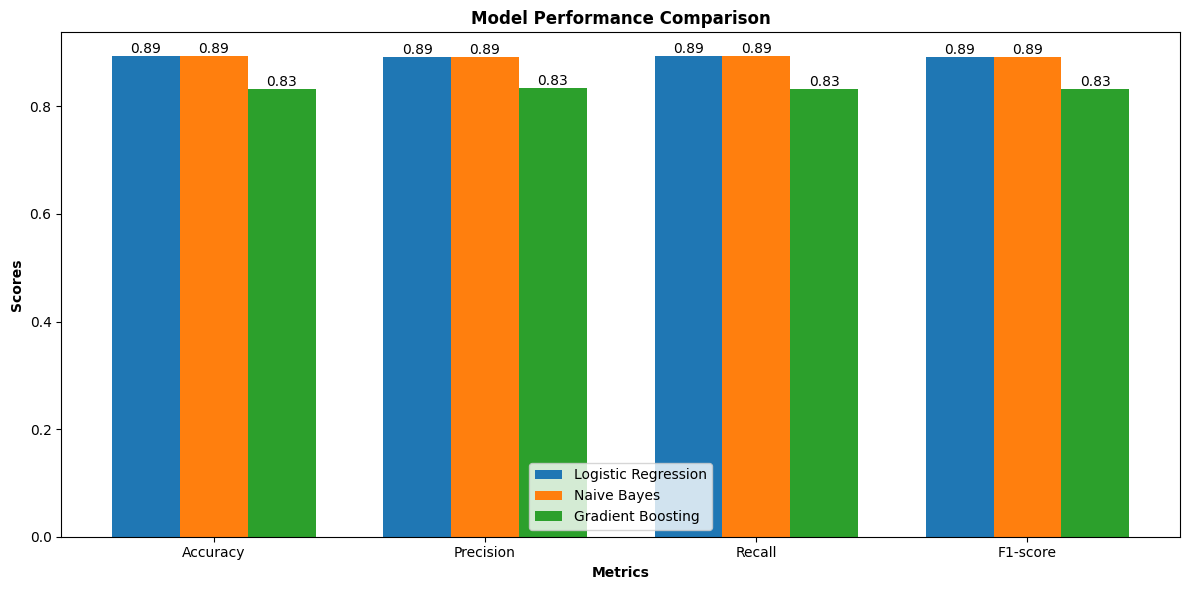

In [16]:
import numpy as np

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
barWidth = 0.25

# Set positions of the bars on X axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
index = np.arange(len(metrics))

# Create bars for each model
bar1 = ax.bar(index, results_df.iloc[0, 1:], barWidth, label='Logistic Regression', color='#1f77b4')
bar2 = ax.bar(index + barWidth, results_df.iloc[1, 1:], barWidth, label='Naive Bayes', color='#ff7f0e')
bar3 = ax.bar(index + 2 * barWidth, results_df.iloc[2, 1:], barWidth, label='Gradient Boosting', color='#2ca02c')

# Customize the plot
ax.set_xlabel('Metrics', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Model Performance Comparison', fontweight='bold')
ax.set_xticks(index + barWidth)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Step 3: Track CPU/Runtime Computation for Training and Inference

3. Track CPU/Runtime during model training and inference:
    * Objective: Measure time-to-train and time-to-inference to assess computational efficiency.

In [7]:
!poetry add memory_profiler

Skipping virtualenv creation, as specified in config file.
Using version ^0.61.0 for memory-profiler

Updating dependencies
Resolving dependencies... (39.1s)://files.pythonhosted.org/packages/7f/2e/939111841b78ca556b84725827daefd69a50f39b0269341df0c8e58ac785/construct-2.5.3.tar.gz (3.9s)Resolving dependencies... (4.1s)Resolving dependencies... (4.3s)Resolving dependencies... (7.6s)Resolving dependencies... (19.6s)Resolving dependencies... (25.6s)Resolving dependencies... (27.0s)Resolving dependencies... (31.3s)Resolving dependencies... (33.5s)Resolving dependencies... (33.6s)Resolving dependencies... (33.9s)

Package operations: 1 install, 0 updates, 0 removals

  - Installing memory-profiler (0.61.0): Pending...
  - Installing memory-profiler (0.61.0): Downloading... 0%
  - Installing memory-profiler (0.61.0): Downloading... 100%
  - Installing memory-profiler (0.61.0): Installing...
  - Installing memory-profiler (0.61.0)

Writing lock file


In [24]:
import time
import pandas as pd
from memory_profiler import memory_usage
import numpy as np

def fit_and_measure(pipeline, X_train, y_train):
    start_time = time.time()
    mem_usage = memory_usage((pipeline.fit, (X_train, y_train)), interval=0.1, timeout=200)
    train_time = time.time() - start_time
    return train_time, max(mem_usage) - min(mem_usage)

def predict_and_measure(pipeline, X_test):
    #amplify the X_test dataset
    X_test = np.repeat(X_test, 100)
    start_time = time.time()
    mem_usage = memory_usage((pipeline.predict, (X_test,)), interval=0.1, timeout=200)
    inference_time = time.time() - start_time
    return inference_time, max(mem_usage) - min(mem_usage)

# Measure training time and RAM usage
train_time_log_reg, train_ram_log_reg = fit_and_measure(log_reg_pipeline, X_train, y_train)
train_time_nb, train_ram_nb = fit_and_measure(nb_pipeline, X_train, y_train)
train_time_gbc, train_ram_gbc = fit_and_measure(gbc_pipeline, X_train, y_train)

# Measure inference time and RAM usage
inference_time_log_reg, inference_ram_log_reg = predict_and_measure(log_reg_pipeline, X_test)
inference_time_nb, inference_ram_nb = predict_and_measure(nb_pipeline, X_test)
inference_time_gbc, inference_ram_gbc = predict_and_measure(gbc_pipeline, X_test)


# Create a dictionary with the results
results = {
    **results,
    **{
    'ModelTraining Time (s)': [train_time_log_reg, train_time_nb, train_time_gbc],
    'Training RAM (MB)': [train_ram_log_reg, train_ram_nb, train_ram_gbc],
    'Inference Time (s)': [inference_time_log_reg, inference_time_nb, inference_time_gbc],
    'Inference RAM (MB)': [inference_ram_log_reg, inference_ram_nb, inference_ram_gbc]
    }
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-score  ModelTraining Time (s)  Training RAM (MB)  Inference Time (s)  Inference RAM (MB)
Logistic Regression  0.892792   0.892653 0.892792  0.892675                7.679530          61.882812           40.923478          876.488281
        Naive Bayes  0.893042   0.892351 0.893042  0.892530                2.139008          50.242188           36.202728          870.066406
  Gradient Boosting  0.831708   0.834254 0.831708  0.832390               32.975606          59.269531           43.598783         1068.023438


/tmp/ipykernel_200/3724189784.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipykernel_200/3724189784.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipykernel_200/3724189784.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipykernel_200/3724189784.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


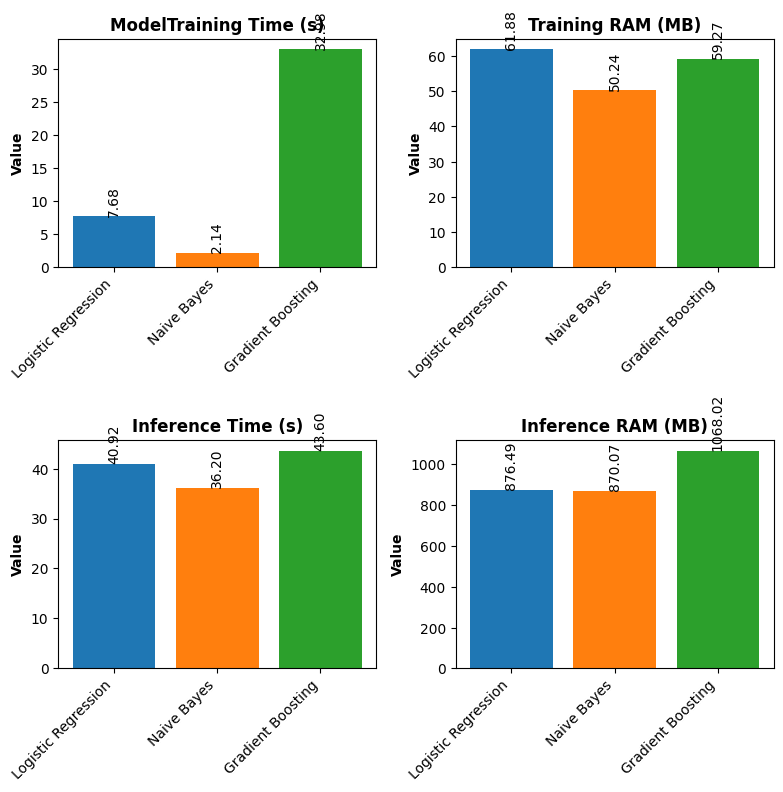

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics and models
metrics = ['ModelTraining Time (s)', 'Training RAM (MB)', 'Inference Time (s)', 'Inference RAM (MB)']
models = results['Model']

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()  # Flatten the 2x2 array to make it easier to iterate

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a bar chart for each metric
for i, metric in enumerate(metrics):
    ax = axs[i]
    values = results[metric]
    
    bars = ax.bar(models, values, color=colors)
    
    ax.set_title(metric, fontweight='bold')
    ax.set_ylabel('Value', fontweight='bold')
    ax.set_xticklabels(models, rotation=45, ha='right')
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Step 4: Feature Engineering for Logistic Regression

4. Improve Logistic Regression with Feature Engineering:
    * Objective: Use feature importance or manual inspection to remove irrelevant words (e.g., words with low predictive value).

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names and coefficients
feature_names = log_reg_pipeline.named_steps['vectorizer'].get_feature_names_out()
coefficients = log_reg_pipeline.named_steps['classifier'].coef_

# Function to get top features
def get_top_features(coef, feature_names, top_n=20):
    top_positive = sorted(zip(coef, feature_names), reverse=True)[:top_n]
    top_negative = sorted(zip(coef, feature_names))[:top_n]
    return top_positive, top_negative

# Compute top features for all labels before plotting
n = 10  # Number of top positive and negative features to display

top_features = {}
for label_id, label_name in labels.items():
    top_features[label_name] = get_top_features(coefficients[label_id], feature_names, top_n=n)

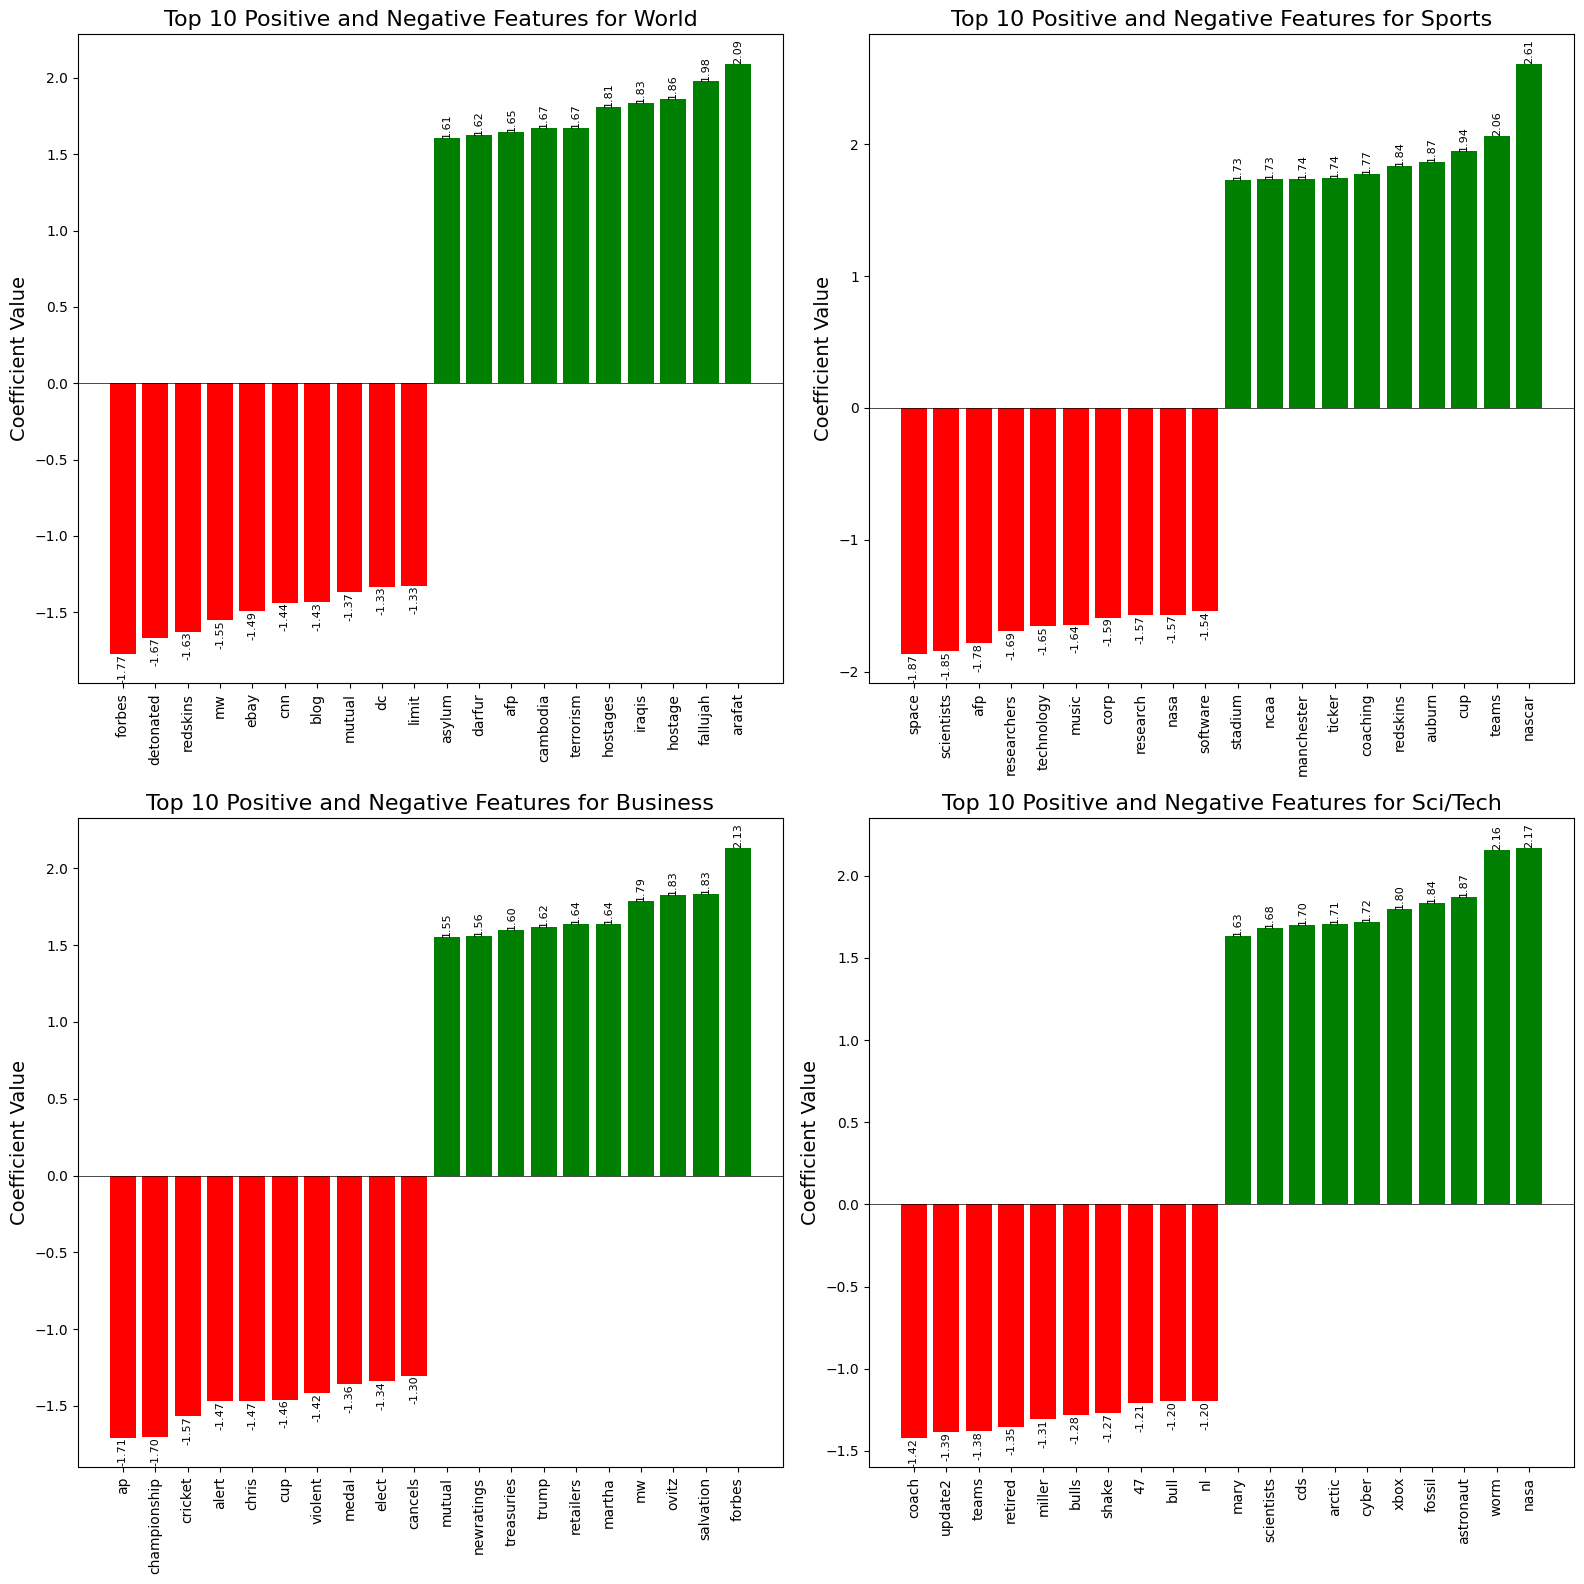

In [40]:
# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.ravel()

# Increase font size
plt.rcParams.update({'font.size': 12})

for i, (label_id, label_name) in enumerate(labels.items()):
    top_positive, top_negative = top_features[label_name]
    
    ax = axs[i]
    x_pos = np.arange(n*2)
    
    # Combine positive and negative features, limiting to n each
    features = [f[1] for f in top_negative[:n] + top_positive[:n][::-1]]
    values = [f[0] for f in top_negative[:n] + top_positive[:n][::-1]]
    
    # Create color list
    colors = ['red']*n + ['green']*n
    
    bars = ax.bar(x_pos, values, align='center', color=colors)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(features, rotation=90, ha='center', fontsize=10)
    ax.set_ylabel('Coefficient Value', fontsize=14)
    ax.set_title(f'Top {n} Positive and Negative Features for {label_name}', fontsize=16)
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom' if height > 0 else 'top',
                rotation=90, fontsize=8)

    # Increase font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

Let's try to add a few things to the pipeline:

1. Use collocations to improve the vectorizer: Create the collocations with nltk and replace them in the text
2. Add bigrams and trigrams to the vectorizer
3. Use lemmatization to avoid having the same word with different tense (run, running, ran)
4. Add lower case only for words that are after a punctuation mark such as . ! ?
5. Add min_df to the vectorizer to remove words that are too common
6. Add NER to get entities such as location, organization and famous people (optional), information we can add to our embeddings

1. Use collocations to improve the vectorizer: Create the collocations with nltk and replace them in the text


In [50]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class CollocationsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=10):
        self.top_n = top_n
        
    def fit(self, X, y=None):
        # Combine all texts to find the most common collocations
        all_words = [word for text in X for word in nltk.word_tokenize(text)]
        self.bigram_finder = BigramCollocationFinder.from_words(all_words)
        self.top_bigrams = self.bigram_finder.nbest(BigramAssocMeasures.chi_sq, self.top_n)
        return self
    
    def transform(self, X):
        def replace_collocations(text):
            for bigram in self.top_bigrams:
                text = text.replace(' '.join(bigram), '_'.join(bigram))
            return text
        
        return [replace_collocations(text) for text in X]

log_reg_pipeline_collocations = Pipeline([
    ('collocations', CollocationsTransformer()),
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

2. Add bigrams and trigrams to the vectorizer

In [51]:
log_reg_pipeline_ngrams = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 3))),
    ('classifier', LogisticRegression(max_iter=200))
])

3. Use lemmatization to avoid having the same word with different tense (run, running, ran)

In [57]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin

class LemmatizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [self.lemmatize_text(text) for text in X]
    
    def lemmatize_text(self, text):
        return ' '.join([self.lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])

log_reg_pipeline_lemma = Pipeline([
    ('lemmatizer', LemmatizeTransformer()),
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

4. Add lower case only for words that are after a punctuation mark such as . ! ?

In [63]:
import re
from sklearn.base import BaseEstimator, TransformerMixin

class LowercaseAfterPunctuationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pattern = re.compile(r'([.!?]\s*)([a-zA-Z])')
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [self.lowercase_after_punctuation(text) for text in X]
    
    def lowercase_after_punctuation(self, text):
        return self.pattern.sub(lambda p: p.group(1) + p.group(2).lower(), text)

log_reg_pipeline_lowercase = Pipeline([
    ('lowercase_after_punctuation', LowercaseAfterPunctuationTransformer()),
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

5. Add min_df to the vectorizer to remove words that are too common

In [64]:
log_reg_pipeline_min_df = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english', min_df=5)),
    ('classifier', LogisticRegression(max_iter=200))
])

6. Add NER to get entities such as location, organization and famous people (optional), information we can add to our embeddings

In [60]:
import spacy

nlp = spacy.load("en_core_web_sm")

def add_ner(text):
    doc = nlp(text)
    for ent in doc.ents:
        text = text.replace(ent.text, f"{ent.label_}_{ent.text}")
    return text

log_reg_pipeline_ner = Pipeline([
    ('preprocessor', FunctionTransformer(add_ner)),
    ('vectorizer', CountVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

Let's look at the performance of the different pipelines:

In [65]:
from tqdm import tqdm

pipelines = [
    ('Original', log_reg_pipeline),
    ('Collocations', log_reg_pipeline_collocations),
    ('N-grams', log_reg_pipeline_ngrams),
    ('Lemmatization', log_reg_pipeline_lemma),
    ('Lowercase after punctuation', log_reg_pipeline_lowercase),
    ('Min DF', log_reg_pipeline_min_df),
    #('NER', log_reg_pipeline_ner)
]

#results = []

for name, pipeline in tqdm(pipelines[4:]):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Pipeline': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

100%|██████████| 2/2 [00:14<00:00,  7.32s/it]

                      Pipeline  Accuracy  Precision    Recall  F1-score
0                     Original  0.892792   0.892653  0.892792  0.892675
1                 Collocations  0.892958   0.892846  0.892958  0.892860
2                      N-grams  0.895792   0.895516  0.895792  0.895625
3                Lemmatization  0.896000   0.895791  0.896000  0.895856
4  Lowercase after punctuation  0.892792   0.892653  0.892792  0.892675
5                       Min DF  0.893167   0.893052  0.893167  0.893074


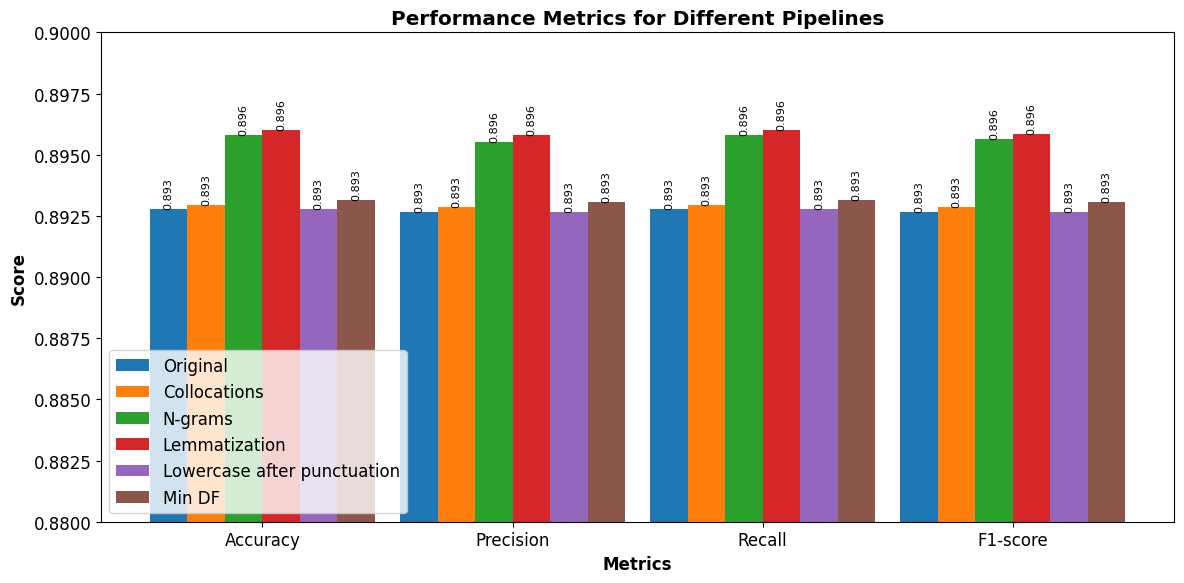

In [68]:
# Extract data from the results
pipelines = [result['Pipeline'] for result in results]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars and positions of the bars on the x-axis
bar_width = 0.15
r = np.arange(len(metrics))

# Plot bars for each pipeline
for i, pipeline in enumerate(pipelines):
    values = [result[metric] for result in results if result['Pipeline'] == pipeline for metric in metrics]
    ax.bar(r + i*bar_width, values, width=bar_width, label=pipeline)

# Customize the plot
ax.set_xlabel('Metrics', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Performance Metrics for Different Pipelines', fontweight='bold')
ax.set_xticks(r + bar_width * (len(pipelines) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on the bars
for i, pipeline in enumerate(pipelines):
    values = [result[metric] for result in results if result['Pipeline'] == pipeline for metric in metrics]
    for j, v in enumerate(values):
        ax.text(r[j] + i*bar_width, v, f'{v:.3f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Set y-axis to start from 0.88 for better visibility of differences
ax.set_ylim(0.88, 0.90)

plt.tight_layout()
plt.show()

Okay therefore let's add a few things in order to improve:
1. Lemmatizer
2. Collocations
3. Add bigrams and trigrams
4. Add min_df at 5

In [69]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

class CombinedPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, top_n_collocations=10):
        self.lemmatizer = WordNetLemmatizer()
        self.top_n_collocations = top_n_collocations
        self.collocations = set()
        
    def fit(self, X, y=None):
        # Find top collocations
        words = [word for text in X for word in nltk.word_tokenize(text)]
        bigram_finder = BigramCollocationFinder.from_words(words)
        self.collocations = set(bigram_finder.nbest(BigramAssocMeasures.chi_sq, self.top_n_collocations))
        return self
    
    def transform(self, X):
        return [self.preprocess_text(text) for text in X]
    
    def preprocess_text(self, text):
        # Tokenize
        words = nltk.word_tokenize(text)
        
        # Replace collocations
        bigrams = list(nltk.bigrams(words))
        for i, bigram in enumerate(bigrams):
            if bigram in self.collocations:
                words[i:i+2] = ['_'.join(bigram)]
        
        # Lemmatize
        words = [self.lemmatizer.lemmatize(word) for word in words]
        
        return ' '.join(words)

# Create the combined pipeline
combined_pipeline = Pipeline([
    ('preprocessor', CombinedPreprocessor()),
    ('vectorizer', CountVectorizer(ngram_range=(1,3), min_df=5, max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=200))
])

In [70]:
# Fit the pipeline
combined_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = combined_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Add the new results to the existing results list
results.append({
    'Pipeline': 'Combined',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

Accuracy: 0.898375
Precision: 0.8981156099776284
Recall: 0.898375
F1-score: 0.898200452791834


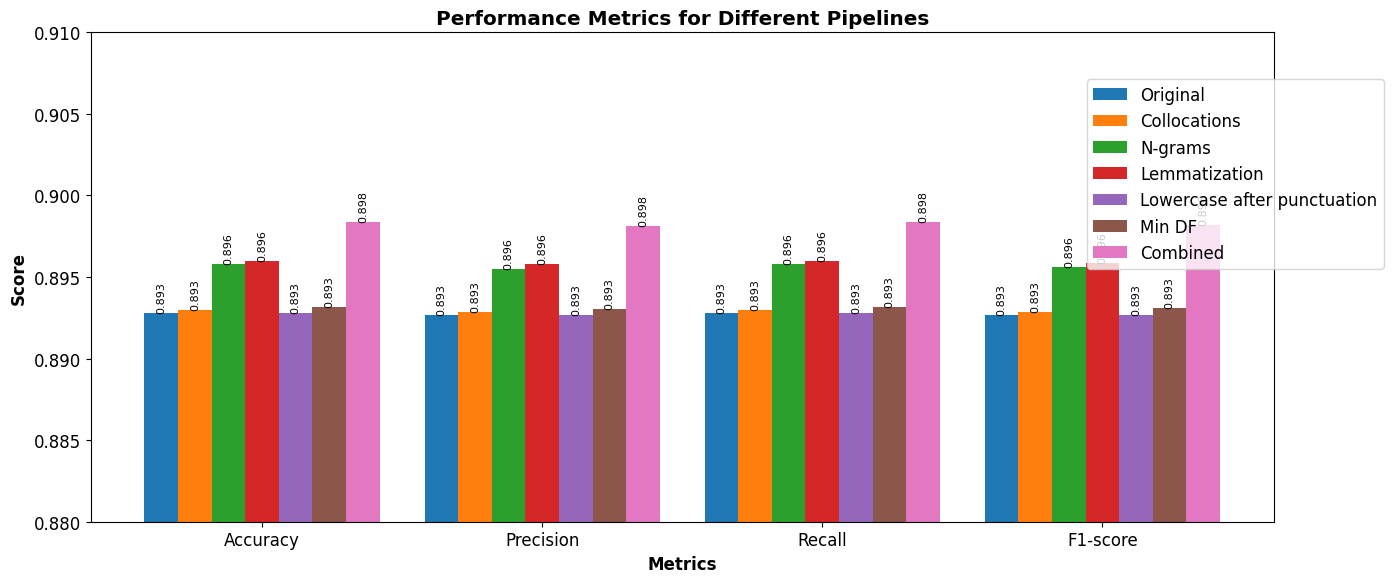

In [74]:
# Extract data from the results
pipelines = [result['Pipeline'] for result in results]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Set width of bars and positions of the bars on the x-axis
bar_width = 0.12
r = np.arange(len(metrics))

# Plot bars for each pipeline
for i, pipeline in enumerate(pipelines):
    values = [result.get(metric, 0) for metric in metrics for result in results if result['Pipeline'] == pipeline]
    ax.bar(r + i*bar_width, values, width=bar_width, label=pipeline)

# Customize the plot
ax.set_xlabel('Metrics', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Performance Metrics for Different Pipelines', fontweight='bold')
ax.set_xticks(r + bar_width * (len(pipelines) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0.5))

# Add value labels on the bars
for i, pipeline in enumerate(pipelines):
    values = [result.get(metric, 0) for metric in metrics for result in results if result['Pipeline'] == pipeline]
    for j, v in enumerate(values):
        ax.text(r[j] + i*bar_width, v, f'{v:.3f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Set y-axis to start from 0.88 for better visibility of differences
ax.set_ylim(0.88, 0.91)

plt.tight_layout()
plt.show()

## Step 5: False Positive/False Negative Analysis for Logistic Regression

5. Analyze Patterns in False Positives and False Negatives:
    * Objective: Detect patterns in false positives/negatives using probabilities from Logistic Regression.

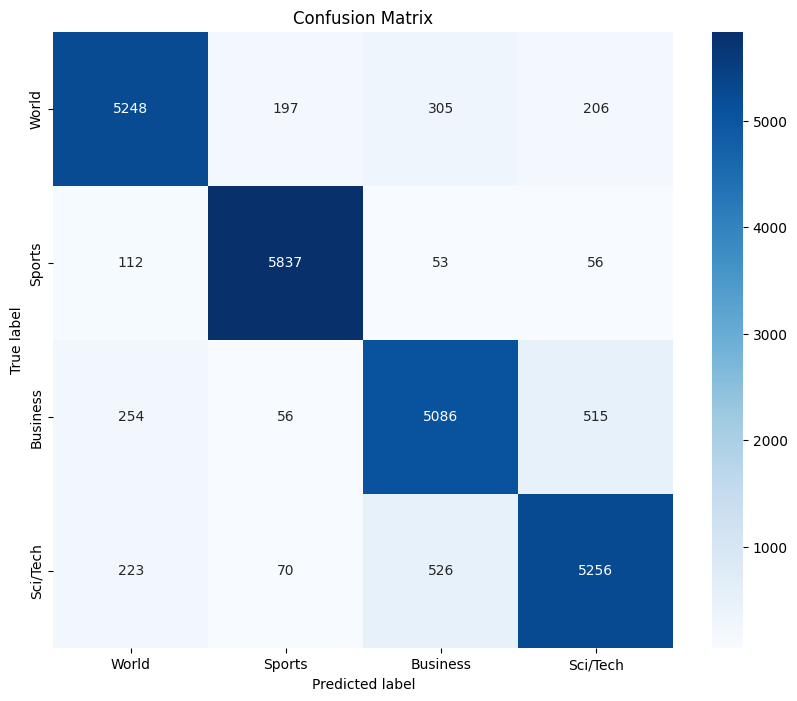

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted labels
y_pred = log_reg_pipeline.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['World', 'Sports', 'Business', 'Sci/Tech']

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

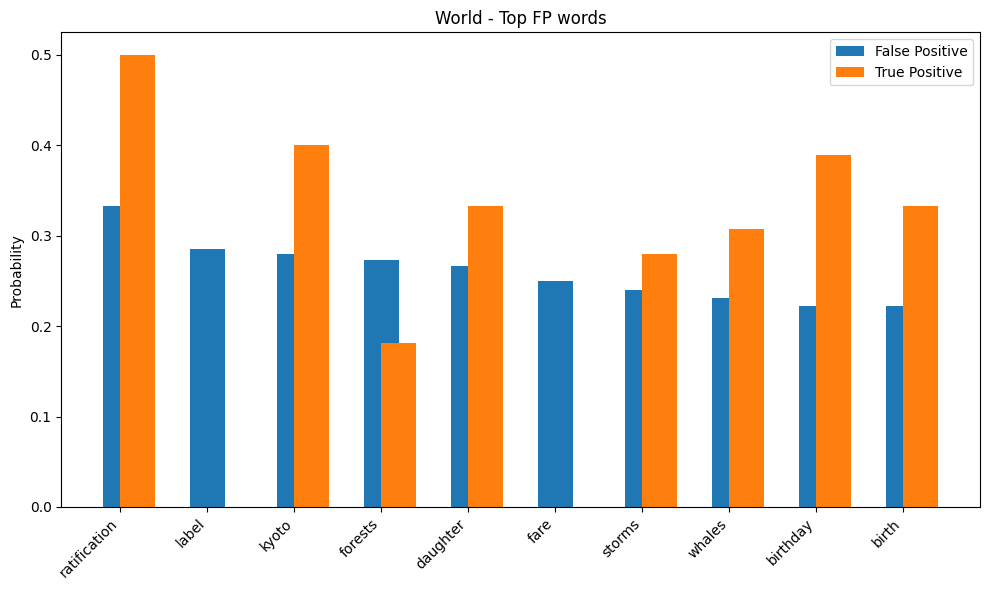

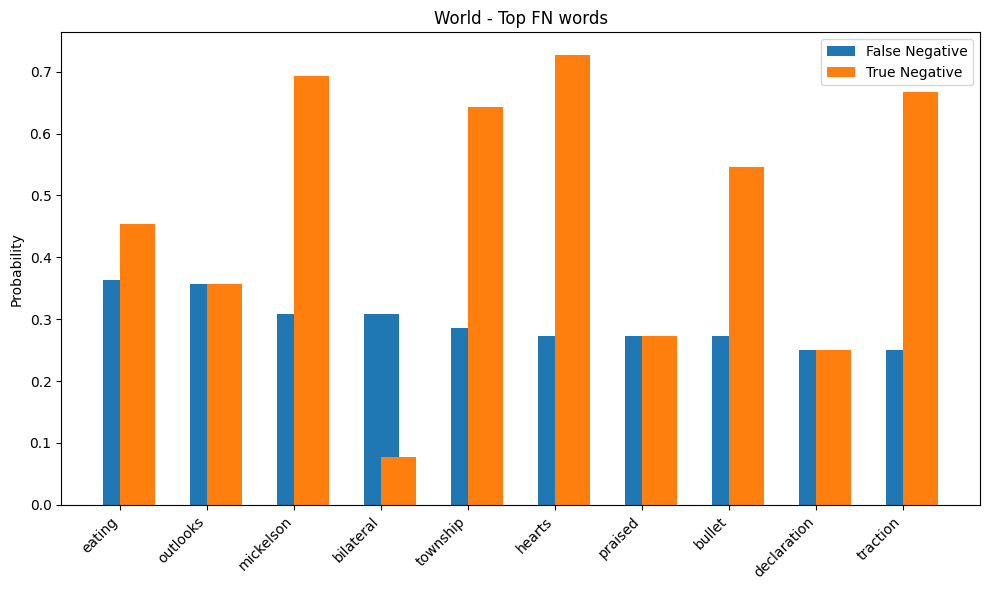

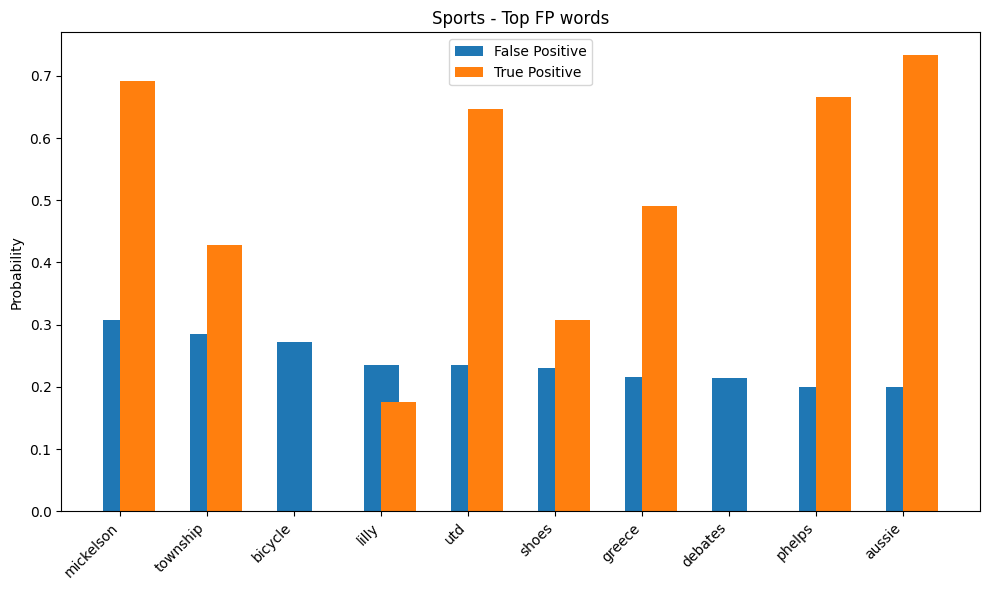

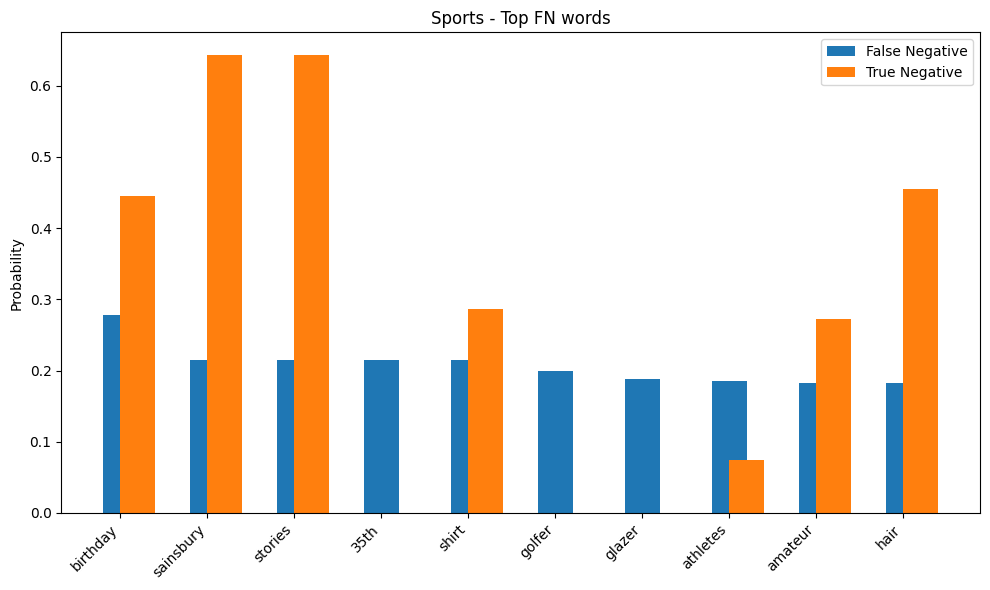

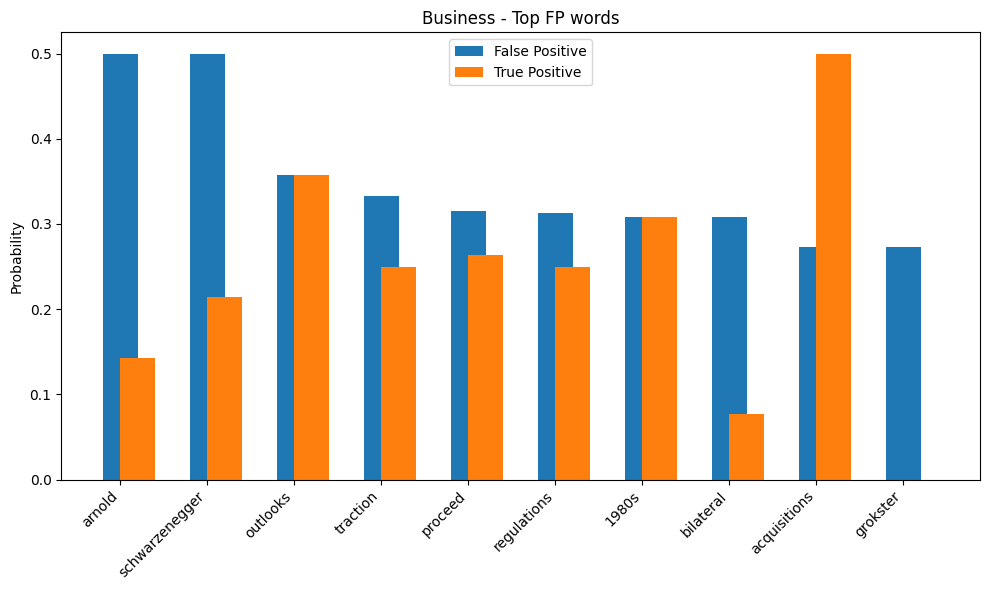

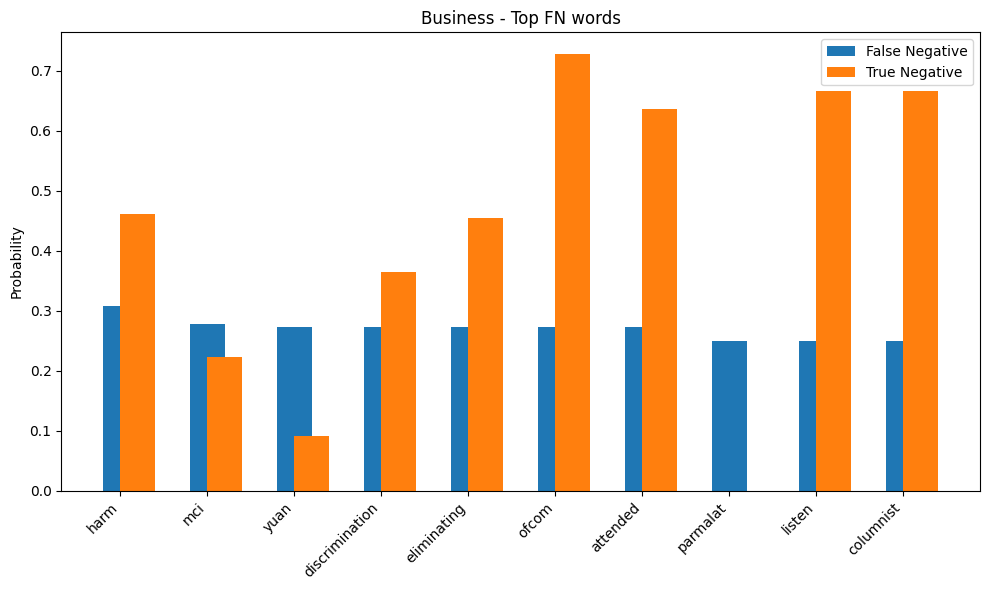

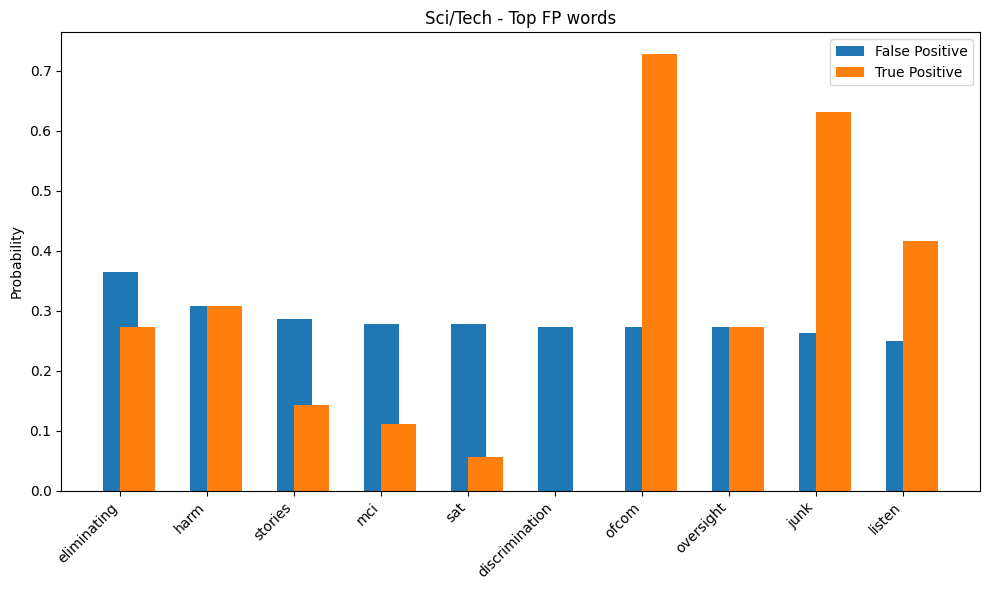

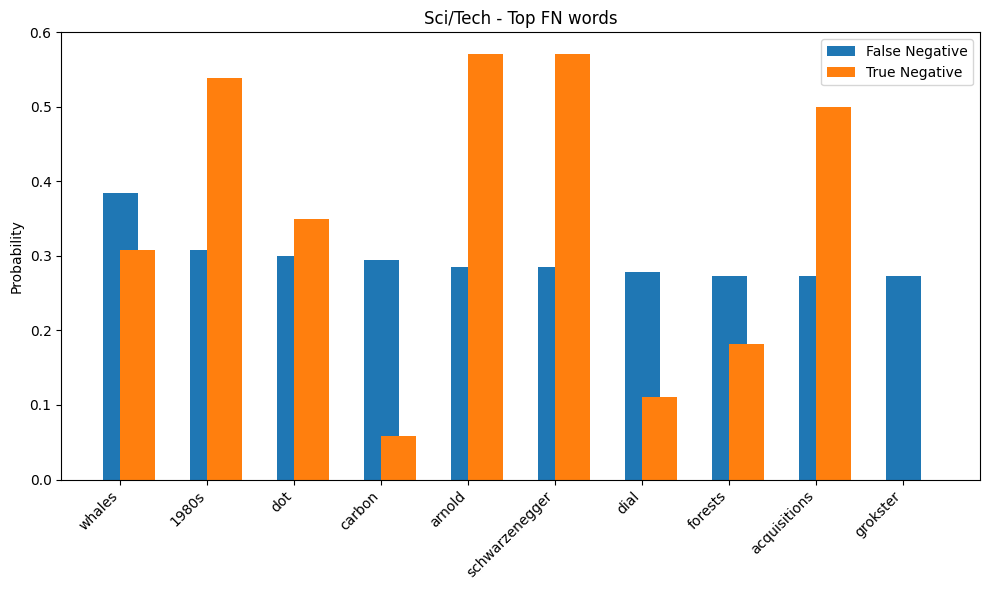

In [16]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_and_count(X_test, y_test, y_pred, labels):
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X_test)
    feature_names = vectorizer.get_feature_names_out()
    
    token_counts = {label: {'TP': Counter(), 'FP': Counter(), 'TN': Counter(), 'FN': Counter()} for label in labels}
    total_counts = Counter()

    for i, (true, pred) in enumerate(zip(y_test, y_pred)):
        tokens = X_vec[i].nonzero()[1]
        for token in tokens:
            word = feature_names[token]
            total_counts[word] += 1
            for label_idx, label in enumerate(labels):
                if true == label_idx and pred == label_idx:
                    token_counts[label]['TP'][word] += 1
                elif pred == label_idx and true != label_idx:
                    token_counts[label]['FP'][word] += 1
                elif true == label_idx and pred != label_idx:
                    token_counts[label]['FN'][word] += 1
                elif true != label_idx and pred != label_idx:
                    token_counts[label]['TN'][word] += 1
    
    return token_counts, total_counts

def calculate_probabilities(token_counts, total_counts, label, min_count=10):
    probs = {'FP': {}, 'TP': {}, 'FN': {}, 'TN': {}}
    for category in probs:
        for word in token_counts[label][category]:
            if total_counts[word] > min_count:
                probs[category][word] = token_counts[label][category][word] / total_counts[word]
    return probs

def plot_comparison(ax, words, probs1, probs2, label1, label2, title):
    x = range(len(words))
    ax.bar(x, [probs1.get(w, 0) for w in words], width=0.4, label=label1, align='center')
    ax.bar(x, [probs2.get(w, 0) for w in words], width=0.4, label=label2, align='edge')
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.legend()

def plot_misclassifications(probs, label, plot_type):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if plot_type == 'FP':
        words = sorted(probs['FP'], key=probs['FP'].get, reverse=True)[:10]
        plot_comparison(ax, words, probs['FP'], probs['TP'], 'False Positive', 'True Positive', f'{label} - Top FP words')
    else:  # FN
        words = sorted(probs['FN'], key=probs['FN'].get, reverse=True)[:10]
        plot_comparison(ax, words, probs['FN'], probs['TN'], 'False Negative', 'True Negative', f'{label} - Top FN words')
    
    plt.tight_layout()
    plt.show()

def analyze_misclassifications_proba(X_test, y_test, y_pred, labels):
    token_counts, total_counts = vectorize_and_count(X_test, y_test, y_pred, labels)
    
    for label in labels:
        probs = calculate_probabilities(token_counts, total_counts, label)
        plot_misclassifications(probs, label, 'FP')
        plot_misclassifications(probs, label, 'FN')

# Run the analysis
analyze_misclassifications_proba(X_test, y_test, y_pred, labels)

To finalize our improvements, we can focus on enhancing the context and specificity of our features. We can implement a multi-pronged approach:

1. N-grams and phrases: We can extend our feature set to include bigrams and trigrams. This can capture more nuanced meanings and contextual relationships between words. For instance, instead of just "bank", we can have features like "river bank" or "financial institution", providing clearer distinctions between different uses of potentially ambiguous terms.

2. Part-of-Speech (POS) tagging: We can incorporate POS information into our features. This can help differentiate between different grammatical uses of the same word. For example, "bank" as a noun might indicate a financial institution, while "bank" as a verb could relate to financial actions or to turning an aircraft.

3. Feature interaction: We can create new features by combining existing ones, particularly focusing on words that frequently co-occur. This can highlight important relationships between terms that aren't captured by individual word features or simple n-grams.

4. Stopword adjustment: Based on our analysis of false positives and negatives, we can refine our stopword list. We may find that some common words, typically removed as stopwords, are actually important discriminators in our specific classification task. Conversely, we might identify words that add noise and should be removed.

By implementing these techniques, we aim to create a richer, more context-aware feature set. This can help our model better distinguish between classes, potentially reducing the instances of high false positive and false negative probabilities we observed in our analysis. After applying these changes, we can re-run our classification and analysis to evaluate the impact and identify any further areas for improvement.